# 實作乳癌診斷，並繪製ROC曲線

## 載入套件

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets

## 載入資料

In [2]:
data = datasets.load_breast_cancer()

In [ ]:
print(data.data.shape) #569筆資料,30個特徵
print(data.target.shape) #569筆資料,1個目標

(569, 30)


## 資料分割

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(data.data[:,:6], data.target, 
                     test_size=0.20) #只用前6個特徵 

## 模型訓練

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), SVC(probability=True))

pipe.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


## 模型預測

In [ ]:
y_pred_proba = pipe.predict_proba(X_test)
np.around(y_pred_proba, 2) #預測為惡性腫瘤的機率,第二欄是預測為良性腫瘤的機率,4捨5入取2位小數

array([[0.51, 0.49],
       [0.41, 0.59],
       [0.02, 0.98],
       [0.11, 0.89],
       [0.99, 0.01],
       [0.65, 0.35],
       [0.94, 0.06],
       [0.04, 0.96],
       [0.95, 0.05],
       [0.01, 0.99],
       [0.47, 0.53],
       [0.09, 0.91],
       [1.  , 0.  ],
       [0.88, 0.12],
       [0.89, 0.11],
       [0.15, 0.85],
       [0.33, 0.67],
       [0.04, 0.96],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.03, 0.97],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.05, 0.95],
       [0.01, 0.99],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.04, 0.96],
       [0.  , 1.  ],
       [0.7 , 0.3 ],
       [0.01, 0.99],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.75, 0.25],
       [0.01, 0.99],
       [0.19,

## 預測值(第2欄)與實際值合併

In [ ]:
df = pd.DataFrame({'predict':np.around(y_pred_proba[:,1], 2), 'actual':y_test}) #y_pred_probai[:,1]是預測為惡性腫瘤的機率,(y_pred_probai[:,1],2)是取2位小數
df

,predict,actual
0,0.49,0
1,0.59,0
2,0.98,1
3,0.89,1
4,0.01,1
...,...,...
109,0.15,0
110,0.42,1
111,0.99,1
112,0.69,1


## 依預測值降冪排序

In [8]:
df2=df.sort_values(by='predict', ascending=False)# 大到小排序
df2

,predict,actual
113,1.0,1
76,1.0,1
35,1.0,1
87,1.0,1
21,1.0,1
...,...,...
44,0.0,0
50,0.0,0
54,0.0,0
55,0.0,0


## 繪製ROC曲線

Text(0.5, 0, '偽陽率')

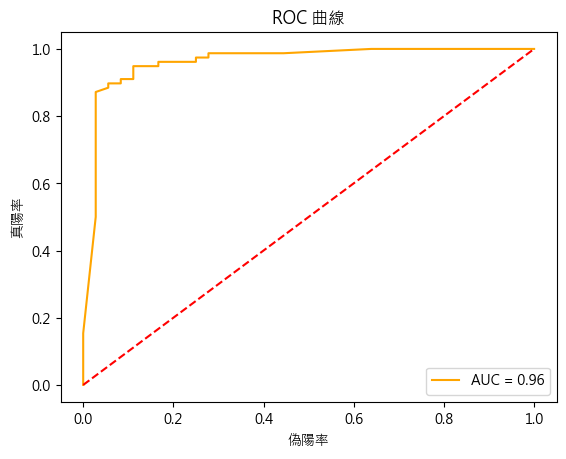

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# 修正中文亂碼 
#plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  
plt.rcParams["font.family"] = ["Microsoft JhengHei"]
plt.rcParams['axes.unicode_minus'] = False

fpr, tpr, threshold = roc_curve(df['actual'], df['predict']) #計算真正率和假正率
# print(fpr) #假正率
# print(tpr) #真正率
# print(threshold) #閾值
# print(roc_auc_score(df['actual'], df['predict'])) #計算AUC
auc1 = auc(fpr, tpr)
plt.title('ROC 曲線')
plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('真陽率')
plt.xlabel('偽陽率')

In [10]:
roc_auc_score(df2.actual, df2.predict)

0.9954391891891892